In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.append("/content/drive/MyDrive/work/ML_final_project") ## the path of the directory where you place dense.py, activation.py ....

In [ ]:
import os
import math
import time 
import numpy as np
from cv2 import imread, IMREAD_GRAYSCALE # IMREAD_GRAYSCALE allow you to load the image as gray scale image
from pandas import read_csv
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models


Testing data

In [ ]:
data = read_csv("/content/drive/MyDrive/ML_final_project/training.csv")

display(data)

y_train = data[["murderer"]].to_numpy()
L = len(y_train)
y_train.shape = (L,)
display(y_train.shape)

,png,name,gender,age,case,murderer
0,png_001,Kurosawa to uma,m,60,1,0
1,png_002,Sodo chiyon,m,48,1,0
2,png_003,Ogata Natsuyo,f,0,1,0
3,png_004,Mitsuhiko Busshu,m,18,1,0
4,png_005,Saotome Ryoko,f,18,1,0
...,...,...,...,...,...,...
287,png_288,Yuki Oka Sohei,m,17,31,0
288,png_289,Maki-mura Akemi,f,22,32,0
289,png_290,Ko toyozono,f,22,32,0
290,png_291,Akimoto kazu na,f,22,32,1


(292,)

Traingdata images

In [ ]:
def getimage(choose_data):  
  m = choose_data[["png"]].to_numpy()
  L = len(m)
  m.shape = (L,)
  ret = np.array([])
  for imgname in m:
    # display(imgname)
    img = imread("/content/drive/MyDrive/ML_final_project/Training_data/"+imgname+".png", IMREAD_GRAYSCALE)
    max = img.max()
    ret = np.append(ret, img/max)

  ret.shape = (L,75,75,1)
  return ret

In [ ]:
X_train = getimage(data)

In [ ]:
# PATH = "/content/drive/MyDrive/ML_final_project/Training_data"  #path to your training image
# file_dir = os.listdir(PATH) #read the images from the directory
# file_dir.sort() #Make sure the images are loaded in order
# X_train = np.array([])

# L = len(file_dir)
# for imgname in file_dir:
#   img = imread("/content/drive/MyDrive/ML_final_project/Training_data/"+imgname, IMREAD_GRAYSCALE)
#   max = img.max()
#   X_train = np.append(X_train, img/max)

# X_train.shape = (L,75,75,1)
# display(X_train.shape)

In [ ]:
def showsomeimage(images):
    # plot first few images
  for i in range(9):
      # define subplot
      plt.subplot(330 + 1 + i)
      # plot raw pixel data
      plt.imshow(images[i].squeeze(), cmap='gray', vmin=0, vmax=1)
  # show the figure
  plt.show()

  # check the shape of training data and testing data
  print('Train: X=%s, y=%s' % (images.shape, y_train.shape))
  # print('Test: X=%s' % (X_test.shape, ))

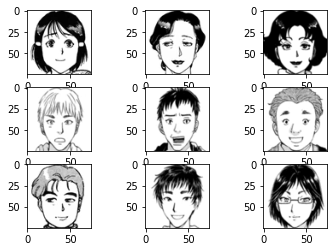

Train: X=(233, 75, 75, 1), y=(233,)


In [ ]:
showsomeimage(X_train)

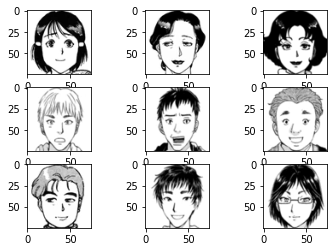

Train: X=(233, 75, 75, 1), y=(233,)


In [ ]:
# # plot first few images
# for i in range(9):
#     # define subplot
#     plt.subplot(330 + 1 + i)
#     # plot raw pixel data
#     plt.imshow(X_train[i].squeeze(), cmap='gray', vmin=0, vmax=1)
# # show the figure
# plt.show()

# # check the shape of training data and testing data
# print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
# # print('Test: X=%s' % (X_test.shape, ))

Split data

In [ ]:
from sklearn.model_selection import train_test_split
#You can split training and validation set here. (Optional)
### START CODE HERE ###
print("X_train.shape: ",X_train.shape)
X_train,X_val,y_train,y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
print("X_train.shape: ",X_train.shape)
print("X_val.shape: ",X_val.shape)
print("y_train.shape: ",y_train.shape)
print("y_val.shape: ",y_val.shape)
### END CODE HERE ###

In [ ]:
from keras.utils.layer_utils import count_params
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(75, 75, 1)))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation="sigmoid"))
model.summary()

learn_rate=0.0001
epoch=30
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=learn_rate),
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epoch, validation_data=(X_val, y_val))
# history = model.fit(X_train, y_train, epochs=epoch)

Text(0.5, 1.0, 'Learning rate =0.0001')

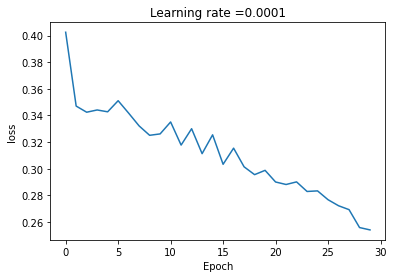

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title("Learning rate =" + str(learn_rate))
# plt.ylim([0.5, 1])
# plt.legend(loc='lower right')


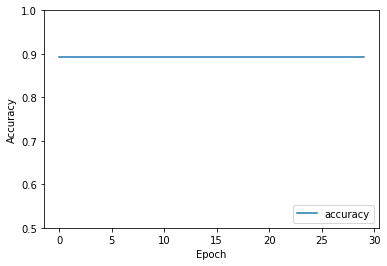

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
# plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


In [ ]:
pred_test = model.predict(X_val)
# pred_test = np.argmax(pred_test, axis = 1)
print(pred_test)
# pred_test[pred_test >= 0.5] = 1
# pred_test[pred_test < 0.5] = 0
# pred_test.shape = (60)
# pred_test = pred_test.astype('int64')
# print(pred_test)

In [ ]:
# display(data)
c = data.loc[data["case"]==5]
display(c)
cas1img = getimage(c)
# showsomeimage(cas1img)
pred_test = model.predict(cas1img)
print(pred_test)

In [ ]:
yes = 0
no = 0
for i in range(1,33):
  print("case: ",i)
  c = data.loc[data["case"]==i]
  c = c.reset_index(drop=True)
  # display(c)
  cas1img = getimage(c)
  # showsomeimage(cas1img)
  pred = model.predict(cas1img)
  print(pred)
  murder = c[c["murderer"] == 1].index
  max = 0
  pred_index = -1
  L = len(pred)
  for j in range(L):
    if pred[j] > max:
      max = pred[j]
      pred_index = j
  # print(pred_index,murder)
  if pred_index == murder[0]:
    print("yes")
    yes += 1
  else:
    print("No")
    no += 1
    
yes/(yes+no)
